# 📊 Exploratory Data Analysis (EDA) – Vehicle Sales Dataset

This exploratory data analysis (EDA) aims to prepare the dataset for model training by:

- Cleaning and transforming raw features,
- Analyzing data distributions and identifying patterns,
- Detecting outliers or low-value features,
- Identifying relevant variables to use in the model,
- Summarizing actionable insights to inform feature selection.

The results of this EDA will be used to create a clean and structured dataset ready for machine learning modeling. It will guide the selection of relevant features, ensure data quality, and support the development of a predictive model that accurately identifies top-selling vehicle models.

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style for plots
sns.set(style="whitegrid")

# Load processed dataset
file_path = '../data/processed/car_sales_data_with_synthetic_features.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['Customer Name', 'Phone', 'Car_id'], inplace=True)

# Show first 5 rows
df.head()

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region,Mileage_km_total,Crash_Test_Score,Family_Size
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown,68468,4,2
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora,64053,3,2
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville,24942,5,3
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco,108673,3,3
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville,51660,4,1


In [2]:
# Check for missing values
df.isnull().sum()

# Rename columns using a dictionary
df.rename(columns={
    'Date': 'date',
    'Gender': 'gender',
    'Annual Income': 'annual_income',
    'Dealer_Name': 'dealer_name',
    'Company': 'company',
    'Model': 'model',
    'Engine': 'engine',
    'Transmission': 'transmission',
    'Color': 'color',
    'Price ($)': 'price',
    'Dealer_No ': 'dealer_no',
    'Body Style': 'body_style',
    'Phone': 'phone',
    'Dealer_Region': 'dealer_region',
    'Mileage_km_total': 'mileage_km_total',
    'Crash_Test_Score': 'crash_test_score',
    'Family_Size': 'family_size',
    'Brand_Model': 'brand_model'
}, inplace=True)

# Remove encoding artifact in the 'engine' column
df['engine'] = df['engine'].str.replace('Â', '', regex=False).str.strip()

# Show basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              23906 non-null  object
 1   gender            23906 non-null  object
 2   annual_income     23906 non-null  int64 
 3   dealer_name       23906 non-null  object
 4   company           23906 non-null  object
 5   model             23906 non-null  object
 6   engine            23906 non-null  object
 7   transmission      23906 non-null  object
 8   color             23906 non-null  object
 9   price             23906 non-null  int64 
 10  dealer_no         23906 non-null  object
 11  body_style        23906 non-null  object
 12  dealer_region     23906 non-null  object
 13  mileage_km_total  23906 non-null  int64 
 14  crash_test_score  23906 non-null  int64 
 15  family_size       23906 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 2.9+ MB


In [3]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a combined identifier for brand + model
df['brand_model'] = df['company'] + '-' + df['model']

# List of categorical columns to convert
categorical_columns = [
    'gender', 'dealer_name', 'company', 'model', 'engine',
    'transmission', 'color', 'dealer_no', 'body_style',
    'dealer_region', 'brand_model'
]

# Convert each column to 'category' dtype
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check new data types
df.dtypes

date                datetime64[ns]
gender                    category
annual_income                int64
dealer_name               category
company                   category
model                     category
engine                    category
transmission              category
color                     category
price                        int64
dealer_no                 category
body_style                category
dealer_region             category
mileage_km_total             int64
crash_test_score             int64
family_size                  int64
year                         int32
month                        int32
brand_model               category
dtype: object

In [4]:
# Define custom income bins and labels for grouping
income_bins = [0, 20_000, 50_000, 100_000, 200_000, 1_000_000, df['annual_income'].max()]
income_labels = ['<20k', '20k–50k', '50k–100k', '100k–200k', '200k–1M', '>1M']

# Create a new categorical column based on the income ranges
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels, include_lowest=True)


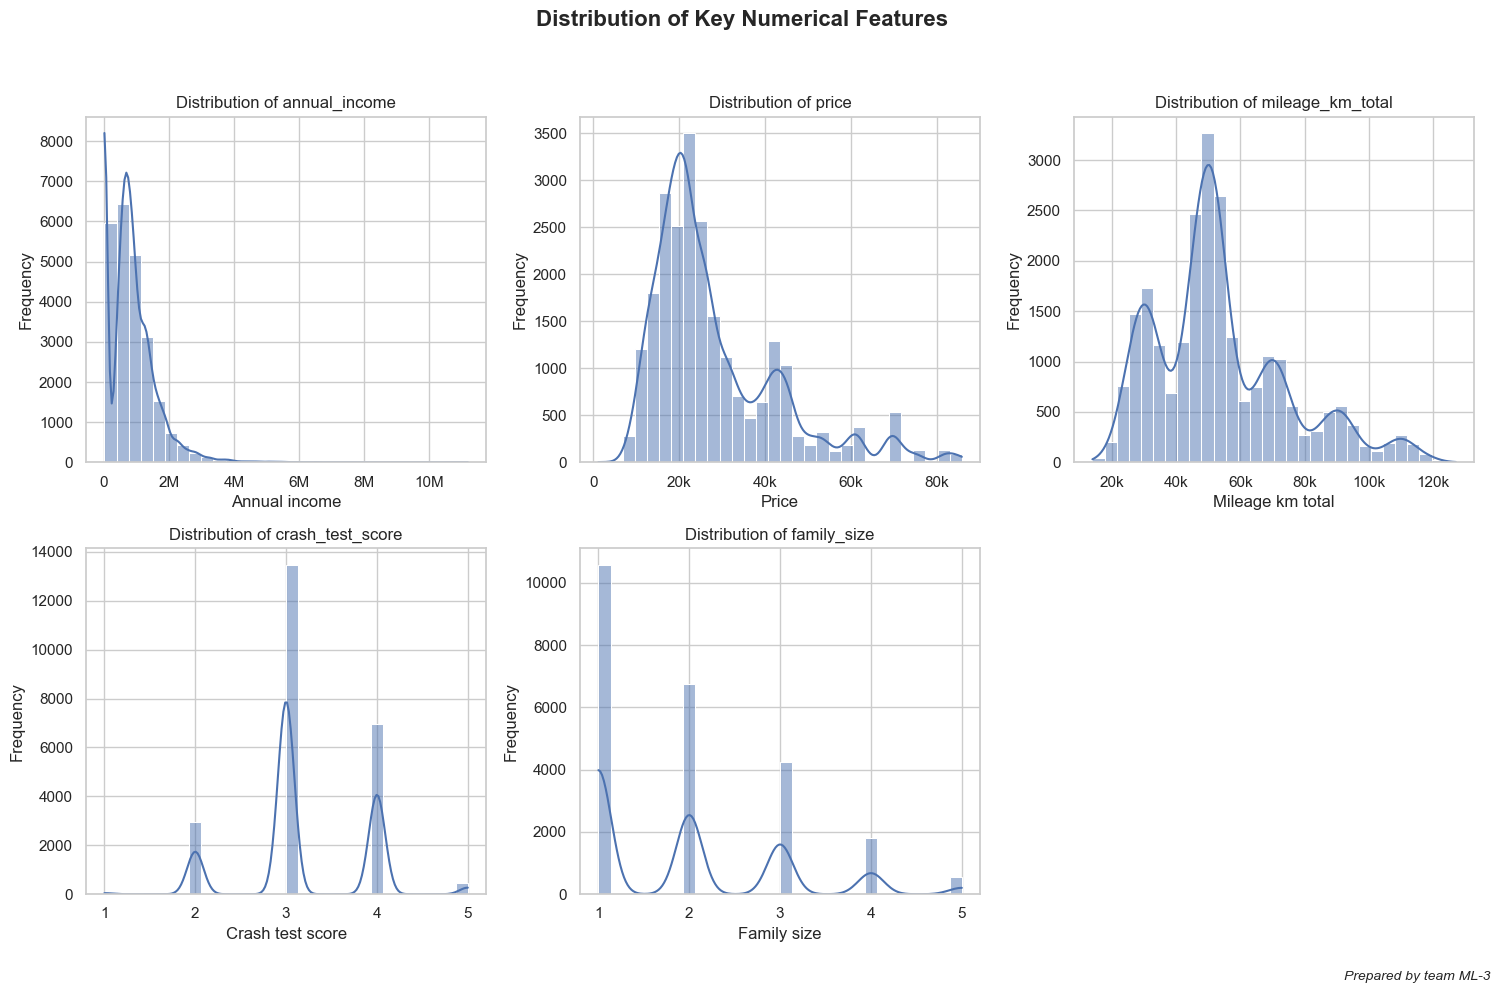

In [5]:
import matplotlib.ticker as mticker

# List of numeric columns
num_cols = ['annual_income', 'price', 'mileage_km_total', 'crash_test_score', 'family_size']

# Custom formatter: 20000 -> 20k, 1000000 -> 1M
def thousands_formatter(x, pos):
    if x >= 1_000_000:
        return f'{int(x/1_000_000)}M'
    elif x >= 1_000:
        return f'{int(x/1_000)}k'
    else:
        return str(int(x))

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms with labels
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col.replace('_', ' ').capitalize())
    axes[i].set_ylabel('Frequency')

    # Apply custom formatter to x-axis
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))

# Remove unused axis
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Title
fig.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold')

# Footer
fig.text(0.95, 0.01, 'Prepared by team ML-3', ha='center', fontsize=10, style='italic')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Insights: Distribution of Key Numerical Features

- **Annual Income** shows a strong right-skewed distribution, with most customers earning below $2M. A few extreme outliers exist, including incomes above $6 million, which may distort modeling. Consider applying capping or transformation (e.g., log scale).

- **Price** is concentrated between $10,000 and $40,000, aligning with typical vehicle pricing. A few higher-end outliers are observed.

- **Mileage (km total)** appears multimodal, with peaks around 30k, 50k, and 70k km, indicating different usage patterns among vehicles.

- **Crash Test Score** is clustered around values 2, 3, and 4, showing discrete rating groups. Most vehicles have a score of 3, suggesting moderate safety levels.

- **Family Size** is heavily skewed toward smaller families, with 1 or 2 members being most common. This could influence the preference for smaller or compact vehicles.

In [6]:
# Custom income bins to group annual income into categories
income_bins = [0, 20_000, 50_000, 100_000, 200_000, 1_000_000, df['annual_income'].max()]

# Readable labels for each income range
income_labels = ['<20k', '20k–50k', '50k–100k', '100k–200k', '200k–1M', '>1M']

# New categorical column 'income_group' based on the defined income bins
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels, include_lowest=True)

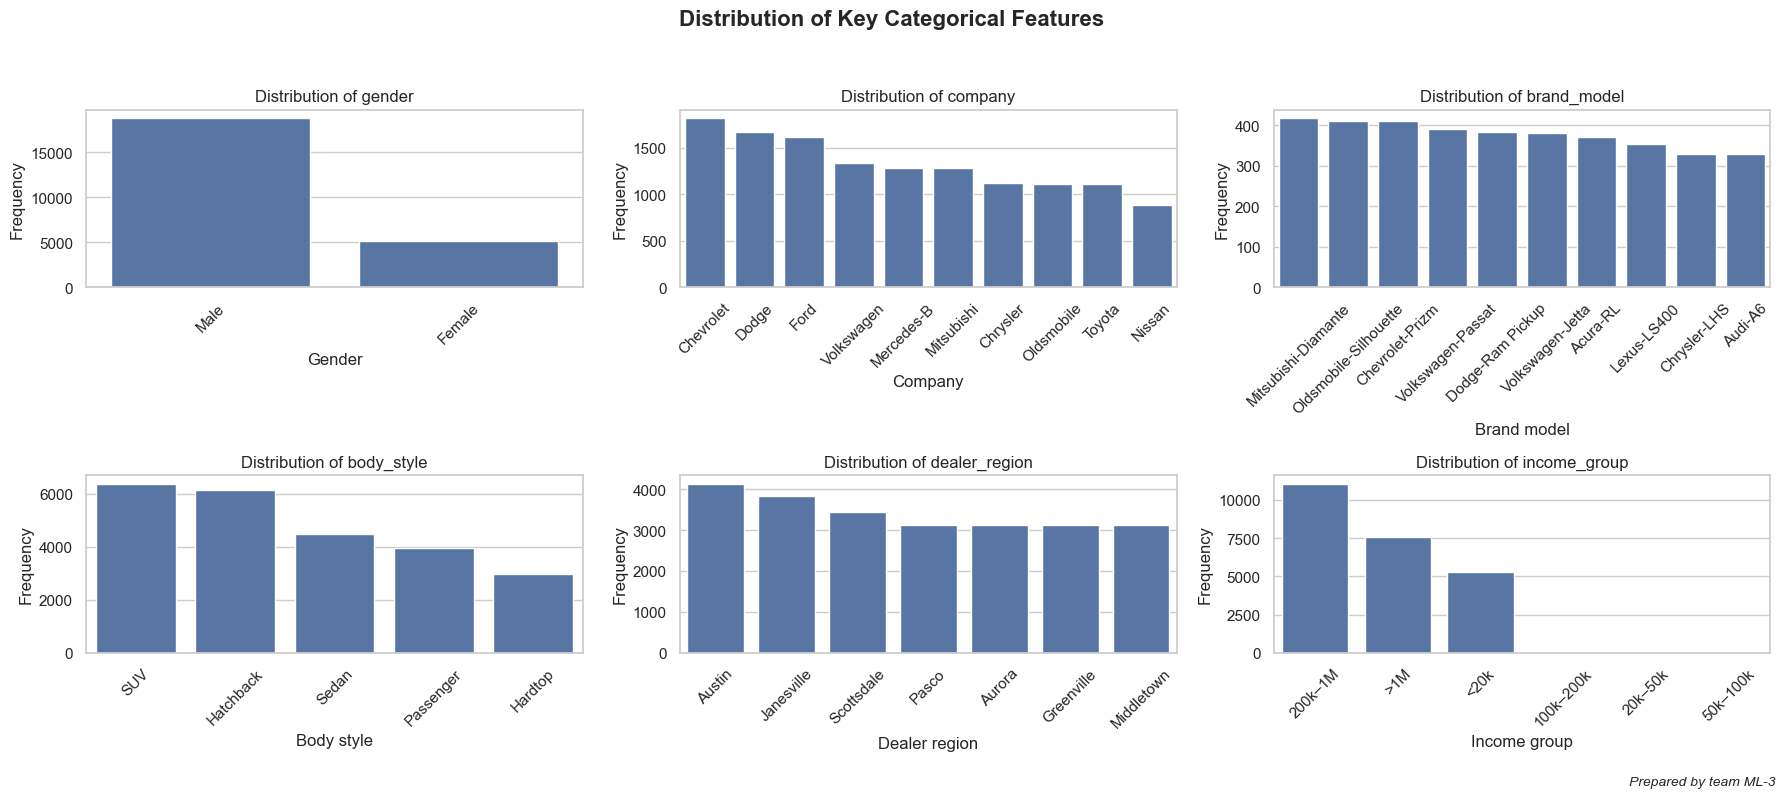

In [7]:
# Categorical columns to analyze
cat_cols = ['gender', 'dealer_name', 'company', 'model', 'engine',
            'transmission', 'color', 'dealer_no', 'body_style',
            'dealer_region', 'brand_model', 'income_group']

# Selected categorical features to plot
selected_cat_cols = ['gender', 'company', 'brand_model', 'body_style', 'dealer_region', 'income_group']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

# Plot each selected categorical feature
for i, col in enumerate(selected_cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:10])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col.replace('_', ' ').capitalize())
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# General title and footer
fig.suptitle('Distribution of Key Categorical Features', fontsize=16, fontweight='bold')
fig.text(0.95, 0.01, 'Prepared by team ML-3', ha='center', fontsize=10, style='italic')

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Insights: Distribution of Key Categorical Features

- **Gender** shows a significant imbalance, with male customers vastly outnumbering female customers. This could impact analysis related to preferences and purchasing behavior.

- **Company** distribution is led by Chevrolet, Dodge, and Ford, indicating these brands are either more popular or more available in the dataset. Nissan appears least frequently among the top brands.

- **Brand Model** insights highlight Mitsubishi-Diamante and Oldsmobile-Silhouette as the most frequent individual models. These could be key targets for marketing or recommendation systems.

- **Body Style** is dominated by SUVs and hatchbacks, suggesting customer preference for practical and versatile vehicle types. Hardtop and passenger vehicles are the least common.

- **Dealer Region** shows Austin and Janesville as the regions with the highest number of entries, possibly indicating higher market activity or dealership size in those areas.

- **Income Group** distribution is skewed toward higher income segments, with most customers earning between $200K–$1M or over $1M. This high-income customer base could influence pricing strategies and premium offerings.


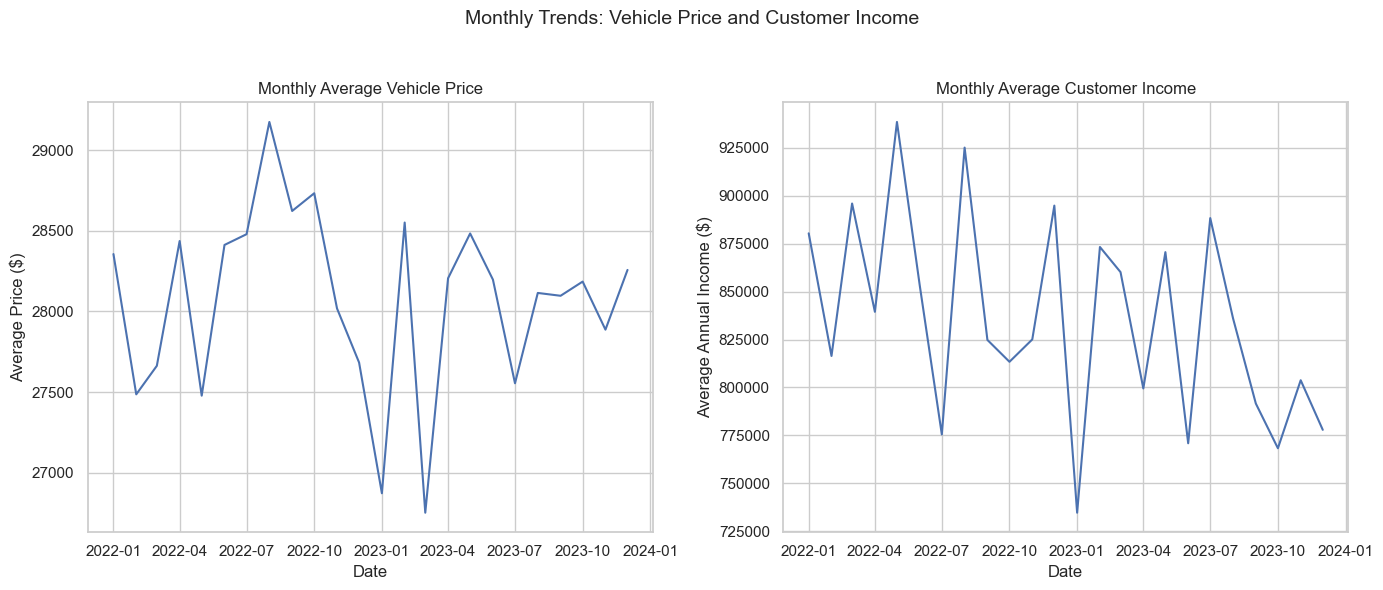

In [10]:
# Group data by year and month to calculate average price and average income
monthly_agg = df.groupby(['year', 'month'])[['price', 'annual_income']].mean().reset_index()

# Create a proper datetime column for time series plotting
monthly_agg['date'] = pd.to_datetime(monthly_agg[['year', 'month']].assign(day=1))

# Create a two-panel plot to show trends over time
plt.figure(figsize=(14, 6))

# Plot Monthly Average Price
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_agg, x='date', y='price')
plt.title('Monthly Average Vehicle Price')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')

# Plot Monthly Average Income
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_agg, x='date', y='annual_income')
plt.title('Monthly Average Customer Income')
plt.xlabel('Date')
plt.ylabel('Average Annual Income ($)')

# Add general title
plt.suptitle('Monthly Trends: Vehicle Price and Customer Income', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Insights: Monthly Trends in Vehicle Price and Customer Income

- **Vehicle Price**: The monthly average vehicle price fluctuates between $27,000 and $29,000, with noticeable seasonal variations. A slight dip is observed around early 2023, followed by a recovery trend. This may reflect promotional periods or shifts in demand.

- **Customer Income**: The average annual income shows greater variability, with a gradual declining trend starting mid-2022. Income levels peaked in early 2022 but began to drop in the second half of the year, potentially impacting vehicle affordability and customer purchasing behavior.

> *Note: While the dataset is synthetic, if these trends were real, external factors such as the economic aftermath of the COVID-19 pandemic could explain some of the observed fluctuations in vehicle prices and customer income.*


In [11]:
# View top and bottom brand_model counts
model_counts = df['brand_model'].value_counts()
model_counts_df = model_counts.reset_index()
model_counts_df.columns = ['brand_model', 'count']

# Show top 10 and bottom 10 models
display(model_counts_df.head(10))
display(model_counts_df.tail(10))

,brand_model,count
0,Mitsubishi-Diamante,418
1,Oldsmobile-Silhouette,411
2,Chevrolet-Prizm,411
3,Volkswagen-Passat,391
4,Dodge-Ram Pickup,383
5,Volkswagen-Jetta,382
6,Acura-RL,372
7,Lexus-LS400,354
8,Chrysler-LHS,330
9,Audi-A6,329


,brand_model,count
145,Hyundai-Accent,35
146,Chrysler-Town & Country,33
147,Mercedes-B-CLK Coupe,29
148,Dodge-Neon,23
149,Volvo-V40,22
150,Mitsubishi-Mirage,19
151,Oldsmobile-Alero,18
152,Lexus-RX300,15
153,Toyota-Avalon,15
154,Chrysler-Sebring Conv.,10


## Insight: Brand Model Frequency Distribution

- **Most Common Models:** The dataset is heavily concentrated on a few models, such as Mitsubishi-Diamante (418), Oldsmobile-Silhouette (411), and Chevrolet-Prizm (411). These top 10 models each have more than 300 records, indicating a strong representation that may benefit model training.

- **Least Common Models:** On the other end, models like Chrysler-Sebring Conv. (10), Toyota-Avalon (15), and Lexus-RX300 (15) have very low representation, which may introduce noise or overfitting issues in a machine learning model.

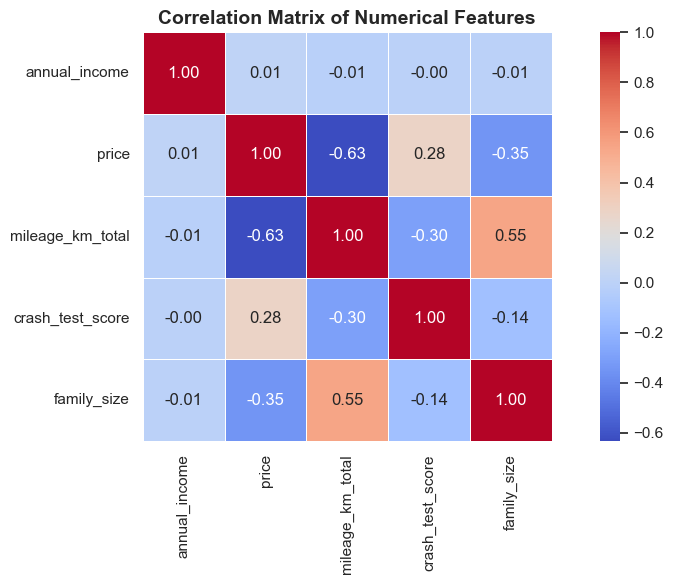

In [12]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Insights: Correlation Matrix of Numerical Features

- **Price and Mileage (km total)** show a strong negative correlation (**-0.63**), indicating that higher mileage vehicles tend to have lower prices — a typical market behavior reflecting depreciation.

- **Family Size and Mileage** are moderately positively correlated (**0.55**), suggesting that larger families may opt for vehicles with more usage.

- **Price and Crash Test Score** have a mild positive correlation (**0.28**), implying that safer vehicles may be slightly more expensive, though the relationship is not strong.

- **Family Size and Price** show a moderate negative correlation (**-0.35**), which may indicate that larger families prefer lower-priced.

- **Annual Income** exhibits negligible correlation with other features, which may suggest that income is not directly influencing vehicle selection within this dataset.

**Recommendation**: None of the features exhibit extremely high multicollinearity (|correlation| > 0.8), so all numerical features can be retained at this stage. However, it may be worth exploring feature importance after training the model to confirm their predictive value.


## 📌 Final Summary: Key Insights & Feature Selection

### 🔍 Key Insights from the EDA

- **Customer Profile**:
  - Majority of customers are male, with a noticeable skew in gender distribution.
  - Most customers fall into the income range of $200k–$1M, with a small portion exceeding $1M.
  - Family size tends to be small, with 1–2 members being the most common.

- **Vehicle Characteristics**:
  - SUVs and Hatchbacks dominate the body style distribution, suggesting higher demand for these types.
  - Top-selling models include Mitsubishi-Diamante, Oldsmobile-Silhouette, and Chevrolet-Prizm.
  - Several vehicle models have extremely low representation and may introduce noise in the model if not handled properly.

- **Temporal Patterns**:
  - Monthly trends reveal seasonal fluctuations in average vehicle price and customer income.
  - There is some alignment between price dips and income variability, which may impact purchasing behavior.

- **Numerical Relationships**:
  - Low correlation between `annual_income` and `price`, suggesting income alone may not be a strong predictor of vehicle price.
  - A moderate negative correlation between `price` and `mileage_km_total` (-0.63) indicates that higher-mileage vehicles are typically priced lower.
  - `family_size` and `mileage_km_total` show a moderate positive correlation (0.55), potentially indicating that larger families use vehicles more extensively.

---

### ✅ Selected Features for Model Training

Based on the EDA and correlation analysis, the following features are selected for the initial machine learning model:

**Numerical Features**:
- `annual_income`
- `price`
- `mileage_km_total`
- `crash_test_score`
- `family_size`

**Categorical Features** (to be one-hot or label encoded):
- `gender`
- `company`
- `model`
- `body_style`
- `transmission`
- `dealer_region`
- `year`
- `month`

**Target Variable**:
- `best_seller` *(binary or multiclass label to be defined based on top N sales threshold)*

In [13]:
# Prepare Final Dataset for Model Training

# Import necessary library to save the file in Parquet format (efficient columnar storage)
import pyarrow

# Define the list of features to be used in the machine learning model
numeric_cols = ['annual_income', 'price', 'mileage_km_total',
                'crash_test_score', 'family_size']
categorical_cols = ['gender', 'company', 'model', 'body_style',
                    'transmission', 'dealer_region', 'year', 'month']

selected_cols = numeric_cols + categorical_cols

# Create a new DataFrame containing only the selected features
df_model = df[selected_cols].copy()

# Save to Parquet (Parquet preserves data types and is efficient for downstream ML pipelines)
output_path = '../data/processed/vehicle_sales_model_ready.parquet'
df_model.to_parquet(output_path, index=False)

# Confirm successful save
print(f"✅ Model‑ready dataset saved to {output_path}")

✅ Model‑ready dataset saved to ../data/processed/vehicle_sales_model_ready.parquet
